In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

In [13]:
start_date='2010-01-01'
end_date='2019-12-31'

df = yf.download('AAPL', start=start_date, end=end_date)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [14]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [15]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


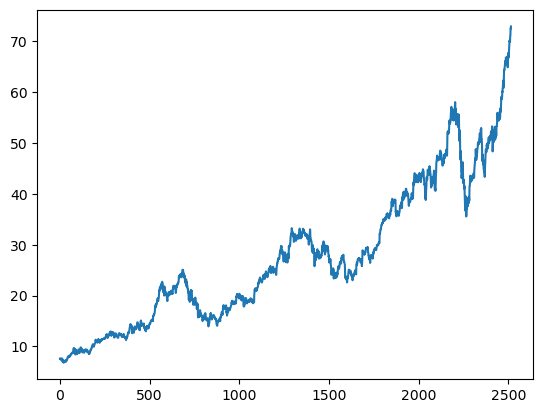

In [18]:
plt.plot(df.Close)

In [19]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

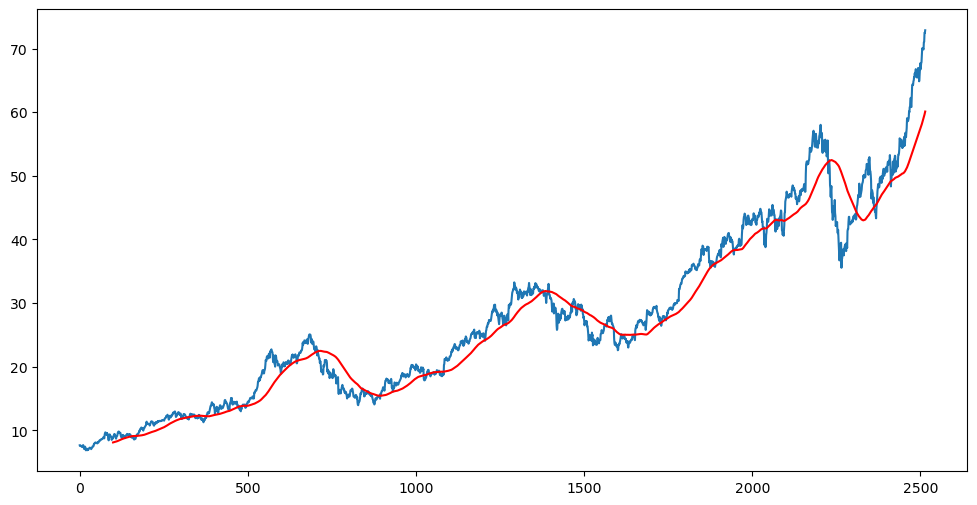

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [23]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

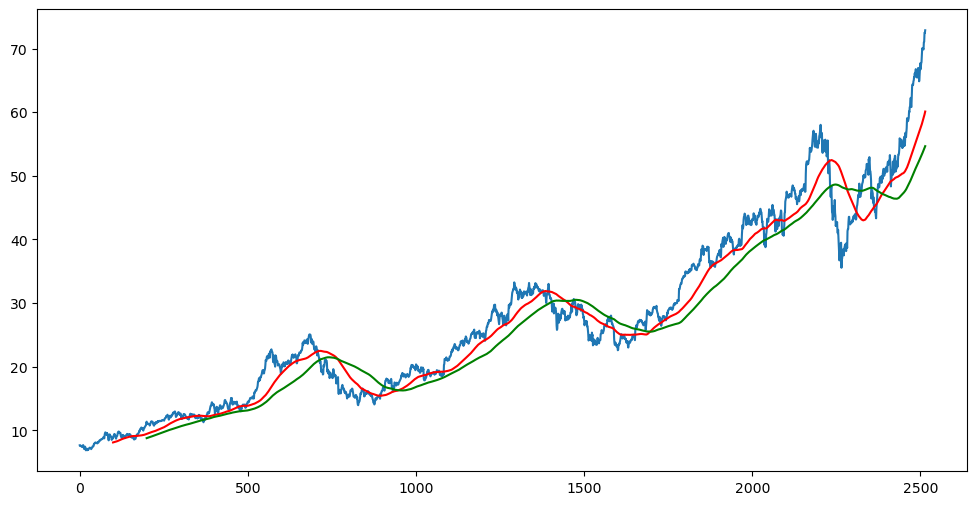

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [26]:
df.shape

(2515, 5)

In [31]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [33]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [35]:
data_training_array=scaler.fit_transform(data_training)

In [36]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [50]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])`
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [51]:
x_train.shape,y_train.shape

((1660, 100, 1), (1660,))

In [48]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [52]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [54]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 13s 178ms/step - loss: 0.0574
Epoch 2/50
52/52 [==============================] - 9s 180ms/step - loss: 0.0115
Epoch 3/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0097
Epoch 4/50
52/52 [==============================] - 10s 195ms/step - loss: 0.0093
Epoch 5/50
52/52 [==============================] - 8s 160ms/step - loss: 0.0087
Epoch 6/50
52/52 [==============================] - 8s 151ms/step - loss: 0.0095
Epoch 7/50
52/52 [==============================] - 10s 185ms/step - loss: 0.0087
Epoch 8/50
52/52 [==============================] - 12s 227ms/step - loss: 0.0078
Epoch 9/50
52/52 [==============================] - 9s 182ms/step - loss: 0.0075
Epoch 10/50
52/52 [==============================] - 9s 172ms/step - loss: 0.0073
Epoch 11/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0070
Epoch 12/50
52/52 [==============================] - 10s 185ms/step - loss: 0.0072
Epoch 13/50
52/52 [=

In [55]:
model.save('keras_model.h5')

C:\Users\Hp\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
past_100_days=data_training.tail(100)

In [57]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_8048\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [58]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [59]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [60]:
input_data.shape

(855, 1)

In [61]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test=np.array(x_test),np.array(y_test)

In [64]:
x_test.shape,y_test.shape

((755, 100, 1), (755,))

In [65]:
y_predicted=model.predict(x_test)

24/24 [==============================] - 2s 58ms/step


In [66]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [67]:
y_predicted

array([[0.1110349 ],
       [0.11104219],
       [0.11104937],
       [0.1110563 ],
       [0.11106287],
       [0.11106905],
       [0.11107491],
       [0.11108059],
       [0.11108619],
       [0.11109182],
       [0.11109754],
       [0.11110336],
       [0.11110924],
       [0.11111522],
       [0.1111213 ],
       [0.1111275 ],
       [0.11113378],
       [0.11114016],
       [0.11114705],
       [0.11115511],
       [0.11116526],
       [0.11117941],
       [0.11119829],
       [0.11123587],
       [0.11131889],
       [0.11148071],
       [0.11175492],
       [0.1121785 ],
       [0.11278018],
       [0.11358884],
       [0.11461747],
       [0.11587387],
       [0.11737268],
       [0.11912239],
       [0.12111607],
       [0.12333561],
       [0.12576108],
       [0.12836958],
       [0.13112682],
       [0.13399315],
       [0.13693011],
       [0.13990507],
       [0.14291424],
       [0.14595154],
       [0.1490153 ],
       [0.15209456],
       [0.1551732 ],
       [0.158

In [69]:
scaler.scale_[0]

0.021232550427044028

In [71]:
scale_factor=1/scaler.scale_[0]
scale_factor

47.09749794006348

In [72]:
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

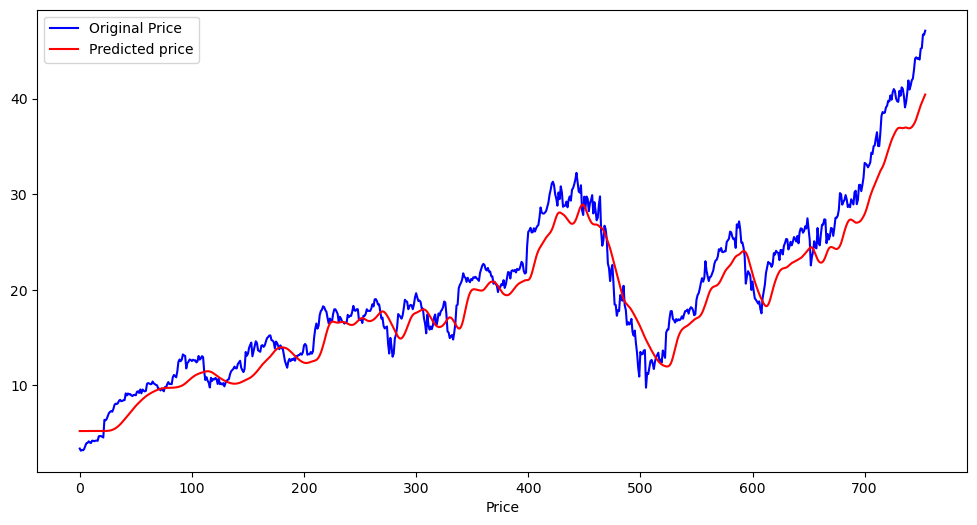

In [73]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Time')
plt.xlabel('Price')
plt.legend()
plt.show()